# DSI Instructor Task Part 1: Modeling
### Background
In this challenge, we'll be working with a dataset which includes measurements of breast cancer cells. The task is to predict for each cell, whether is it malignant or benign.

### Step 1:
Load in the data file and header file provided and attach it to pandas dataframe.

In [52]:
from __future__ import print_function

# Import pandas and numpy modules
import pandas as pd
import numpy as np

# Load in the data file and header file provided
text_file = open("field_names.txt", "r")
lines = text_file.readlines()
# Replace newline character at the end of each header
headers = [h.replace("\n","") for h in lines]
# Load data and attach headers to dataframe
dataframe = pd.read_csv('breast-cancer.csv', names=headers)
# Print data table with headers
dataframe

,ID,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
0,842302,M,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890
1,842517,M,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902
2,84300903,M,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758
3,84348301,M,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300
4,84358402,M,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678
5,843786,M,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440
6,844359,M,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368
7,84458202,M,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,...,17.060,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510
8,844981,M,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,...,15.490,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720
9,84501001,M,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,...,15.090,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750


### Step 2:
Computed mean and median smoothness and compactness for benign and malignant tumors:

In [53]:
# Split the dataset into benign and malignant feature vectors
dataframe_m = dataframe.loc[dataframe['diagnosis'] == "M"]
dataframe_b = dataframe.loc[dataframe['diagnosis'] == "B"]

In [54]:
# Compute the mean and median smoothness for benign and malignant tumors
print("Mean smoothness for malignant tumors: %f" % dataframe_m['smoothness_mean'].mean())
print("Median smoothness for malignant tumors: %f" % dataframe_m['smoothness_mean'].median())
print("Mean smoothness for benign tumors: %f" % dataframe_b['smoothness_mean'].mean())
print("Median smoothness for benign tumors: %f" % dataframe_b['smoothness_mean'].median())

Mean smoothness for malignant tumors: 4.323929
Median smoothness for malignant tumors: 3.679500
Mean smoothness for benign tumors: 2.000321
Median smoothness for benign tumors: 1.851000


In [55]:
# Compute the mean and median compactness for benign and malignant tumors
print("Mean compactness for malignant tumors: %f" % dataframe_m['compactness_mean'].mean())
print("Median compactness for malignant tumors: %f" % dataframe_m['compactness_mean'].median())
print("Mean compactness for benign tumors: %f" % dataframe_b['compactness_mean'].mean())
print("Median compactness for benign tumors: %f" % dataframe_b['compactness_mean'].median())

Mean compactness for malignant tumors: 0.032281
Median compactness for malignant tumors: 0.028590
Mean compactness for benign tumors: 0.021438
Median compactness for benign tumors: 0.016310


As observed from the above values, the mean and median smoothness and compactness for benign and malignant tumors are different. Using the mean and median method on the specified columns in the dataframe, we are able to obtain these values.


### Step 3:
Function to generate bootstrap samples of the data

In [56]:
def generate_bootstrap_samples(dataframe, N=5):
    """Function to generate bootstrap samples of the data.
    Bootstrapping relies on random sampling with replacement.

    Args:
        param1: The dataframe.
        param2: The number of samples to generate.

    Returns:
        A dataframe with N samples.

    """
    sample = dataframe.sample(n=N, replace=True)
    return sample

# Test function output on dataframe
generate_bootstrap_samples(dataframe)

,ID,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
550,923748,B,10.86,21.48,68.51,360.5,0.07431,0.04227,0.00000,0.00000,...,11.66,24.77,74.08,412.3,0.1001,0.07348,0.00000,0.00000,0.2458,0.06592
53,857392,M,18.22,18.70,120.30,1033.0,0.11480,0.14850,0.17720,0.10600,...,20.60,24.13,135.10,1321.0,0.1280,0.22970,0.26230,0.13250,0.3021,0.07987
272,8910988,M,21.75,20.99,147.30,1491.0,0.09401,0.19610,0.21950,0.10880,...,28.19,28.18,195.90,2384.0,0.1272,0.47250,0.58070,0.18410,0.2833,0.08858
258,887181,M,15.66,23.20,110.20,773.5,0.11090,0.31140,0.31760,0.13770,...,19.85,31.64,143.70,1226.0,0.1504,0.51720,0.61810,0.24620,0.3277,0.10190
50,857343,B,11.76,21.60,74.72,427.9,0.08637,0.04966,0.01657,0.01115,...,12.98,25.72,82.98,516.5,0.1085,0.08615,0.05523,0.03715,0.2433,0.06563


### Step 4:
Exploratory Analysis. Variables that are predictive of a malignant tumor:

RW = radius_worst,
TM =  texture_mean,
CPSE = concave_points_sd_error,
CPW = concave_points_worst

From observation, the variables previously outlined are much higher in the case of malignant tumors. This relationship is shown in the following bar chart.

In [110]:
means_benign = [dataframe_b['radius_worst'].mean(), dataframe_b['texture_mean'].mean(), 
                dataframe_b['concave_points_sd_error'].mean(), 
                dataframe_b['concave_points_worst'].mean()]
means_malignant = [dataframe_m['radius_worst'].mean(), dataframe_m['texture_mean'].mean(), 
                dataframe_m['concave_points_sd_error'].mean(), 
                dataframe_m['concave_points_worst'].mean()]

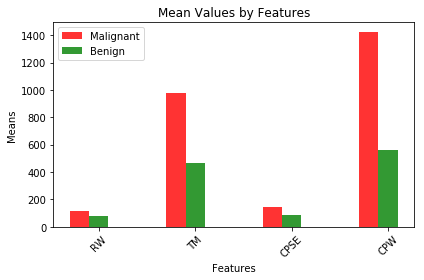

In [111]:
%matplotlib inline
n_groups = 4
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.2
opacity = 0.8
rects1 = plt.bar(index, means_malignant, bar_width, alpha=opacity, 
                 color='r', label='Malignant')
rects2 = plt.bar(index + bar_width, means_benign, bar_width, alpha=opacity,
                 color='g', label='Benign')
plt.xlabel('Features')
plt.ylabel('Means')
plt.title('Mean Values by Features')
plt.xticks(index + bar_width, ('RW', 'TM', 'CPSE', 'CPW'), rotation=45)
plt.legend()
plt.tight_layout()

### Feature Selection with Variance Threshold.
VarianceThreshold is a simple baseline approach to feature selection. It removes all features whose variance does not meet some threshold. By default, it removes features that have the same value in all samples.

<Container object of 30 artists>

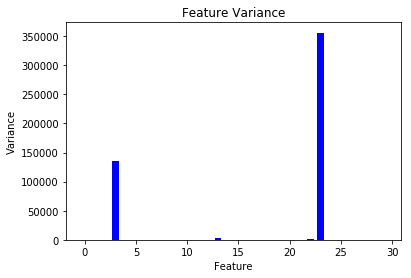

In [113]:
from sklearn import preprocessing
from sklearn.feature_selection import VarianceThreshold
import matplotlib.pyplot as plt
# Split the dataset into X (the feature matrix) and y (the labels)
X_m = dataframe_m.iloc[:, 2:]
X_m = X_m.values
selector = VarianceThreshold()
selector.fit_transform(X_m)
selector.variances_
%matplotlib inline
N = len(selector.variances_)
x = range(selector.variances_.shape[0])
width = 1/1.5
plt.title("Feature Variance")
plt.xlabel("Feature")
plt.ylabel("Variance")
plt.bar(x, selector.variances_, width, color="blue")

In [114]:
# find indices of features with top variances
indices = np.argsort(selector.variances_)[::-1]
print("3 features that are predictive of a malignant tumor:")
for i, j in enumerate(indices[:3]):
    print("%d. %s" % (i+1, headers[j]))

3 features that are predictive of a malignant tumor:
1. concave_points_mean
2. radius_sd_error
3. area_worst


In [58]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
# Create X (features) and y (targets) matrices 
X = dataframe.iloc[:, 2:]
X = X.values
y_labels = dataframe.iloc[:, 1:2].values.flatten()
# Create label indicator matrix from list of malignant and benign labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_labels)
# Split the dataset into random train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=0)

### Feature Selection with univariate feature selection.
Univariate feature selection works by selecting the best features based on univariate statistical tests. SelectKBest selects features according to the k highest scores.

In [112]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
selector = SelectKBest(f_classif, k=3)
selector.fit(X, y_encoded)
indices = np.argsort(selector.scores_)[::-1]
print("Top 3 highest scoring features:")
for i, j in enumerate(indices[:3]):
    print("%d. %s" % (i+1, headers[j]))

Top 3 highest scoring features:
1. concave_points_mean
2. radius_sd_error
3. area_worst


### Step 5: Modeling
### Random Forest Classifier:
A Random forest classifier (RFC) is an ensemble classifier that consists of many decision trees and outputs the class which represents the mode of the classes output by individual trees.
#### Advantages:
A RFC has many advantages. It is one of the most accurate ensemble classifiers and can be trained efficiently fast on large datasets. It can handle thousands of input variables without variable deletion. It gives estimates of what variables are important in the classification. It has an effective method for estimating missing data and maintains accuracy when a large proportion of the data are missing. It has methods for balancing error in class population in skewed datasets. It can be used to compute proximities between pairs of feature vectors, which in turn can be used in an unsupervised fashion like clustering.

#### Disadvantages:
RFC is more complex model. Unlike single decision trees, it is hard to visualize and trace back individual predictions. It is more computationally expensive. It can overfit on noisy datasets. In the case of categorical variables with different levels, RFC can be biased in favor of attributes with high levels.

#### Handling overfitting:
Overfitting describes the situation where the model learns the training data very well but fails to generalized on unseen test data. One of the more obvious way to remedy this problem is to get more training data an inspect how the results vary through a learning curve. In the case of RFC, we can explore tuning the following parameters with a cross validation set prior to testing:
##### n_estimators:
In general the more trees the less likely the algorithm is to overfit, so increasing this parameter could help the model yield better results.
##### max_features:
Reducing the number of features also helps address the problem of over-fitting; however one must avoid making this number too small as it might introduce under-fitting.
##### max_depth and min_samples_leaf:
These parameters reduce the model complexity and lowers the risk of over-fitting on the training set.

In [115]:
from sklearn.ensemble import RandomForestClassifier
classifier_1 = RandomForestClassifier(n_estimators=200)
classifier_1.fit(X_train, y_train)
importances = classifier_1.feature_importances_
indices = np.argsort(importances)[::-1]
print("Feature importance ranking:")
for f in range(3):
    print("%d. feature %d: %s (%f)" % (f + 1, indices[f], headers[2:][indices[f]], importances[indices[f]]))
    
accuracy_train = classifier_1.score(X_train, y_train)
print("Model training accuracy: %f" % accuracy_train)
accuracy_test = classifier_1.score(X_test, y_test)
print("Model test accuracy: %f" % accuracy_test)

Feature importance ranking:
1. feature 22: concave_points_sd_error (0.146039)
2. feature 20: concavity_worst (0.138702)
3. feature 27: fractal_dimension_mean (0.115670)
Model training accuracy: 1.000000
Model test accuracy: 0.956140


### Logistic Regression:
Logistic regression is the classification counterpart to linear regression. Predictions are mapped to be between 0 and 1 through the logistic function, which means that predictions can be interpreted as class probabilities.
#### Advantages:
Outputs have a nice probabilistic interpretation, and the algorithm can be regularized to avoid overfitting. Logistic models can be updated easily with new data using stochastic gradient descent.
#### Disadvantages:
Logistic regression tends to underperform when there are multiple or non-linear decision boundaries. They are not flexible enough to naturally capture more complex relationships.
#### Recursive Feature Elimination (RFE)
Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), the goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a coefficient attribute or through a feature importance attribute. Then, the least important features are removed from current set of features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.
#### Handling overfitting:
In the case of logistic regression, to address the problem of over-fitting one could try reducing number of features in the dataset. Using a feature selection technique like the one previously described could also be a good strategy. Regularization is another good option. It adds a penalty on the different parameters of the model to reduce the freedom of the model. Hence, the model will be less likely to fit to noise in the training data with improved generalization abilities on the test set. 

In [117]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model

# feature extraction
classifier_2 = LogisticRegression()
rfe = RFE(classifier_2, 3)
fit = rfe.fit(X_train, y_train)
indices = np.nonzero(fit.support_)[0]
print("Top 3 features:")
for f in range(3):
    print("%d. feature %d: %s" % (f + 1, indices[f], headers[2:][indices[f]]))

classifier_2.fit(X_train, y_train)
accuracy_train = classifier_2.score(X_train, y_train)
print("Model training accuracy: %f" % accuracy_train)
accuracy_test = classifier_2.score(X_test, y_test)
print("Model test accuracy: %f" % accuracy_test)

Top 3 features:
1. feature 6: perimeter_mean
2. feature 20: concavity_worst
3. feature 26: symmetry_worst
Model training accuracy: 0.958242
Model test accuracy: 0.956140


### Explanation
#### Analysis limitations (technical audience):
Some additional techniques to improve and analyze model performance:
* Learning curves: help inspect model accuracy as we increase the size of training examples. The error rate should generally decrease as we increase the size of training examples. 
* Hyper-parameter tuning: a hyperparameter is parameter whose value is set before the learning process begins. Hyperparameter tuning finds an optimal value for the parameter during cross-validation on the given dataset.
* Validation curves: help determine training and test scores for varying parameter values.
* Area Under ROC Curve: a performance metric for binary classification problems. It represents a model’s ability to discriminate between positive and negative classes. An area of 1.0 represents a model that made all predictions perfectly. An area of 0.5 represents a model as good as random.
* Confusion Matrix: a confusion matrix is a handy presentation of the accuracy of a model with two or more classes.
* Scikit-learn Classification Report: a function displaying the precision, recall, f1-score and support for each class in the dataset.


#### To Non-Technical Audiences
In this exercise, we analyzed measurements of breast cancer cells. For each cell, we tried to determine whether it is malignant or benign. To achieve this, we employed two classification techniques: random forest and logistic regression. 


* Random Forest uses a group of decision trees, where each tree is a bit different from the next. When a set of attributes is passed to the model as unified feature vector, we take the majority vote of the ensemble to get a final prediction. Each tree in the model only sees part of the data (randomly sampled with replacement), and we used a subset of the features for each tree. In our current analysis, the model performed perfectly on the training data and achieved an accuracy of 96% on the test data.
* Logistic regression provides the probability that the given input feature vector belongs to a certain class. The central premise of the model is the assumption that the input space can be separated into homogeneous regions, one for each class, by a linear boundary. In our experiment, the model achieved 96% accuracy on both the training and test sets.

In the RFC model concave_points_sd_error, concavity_worst and fractal_dimension_mean were highly correlated with the diagnosis, whereas perimeter_mean, concavity_worst and symmetry_worst were found to be the top important features in case of logistic regression.